Tâche 9


Calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

In [8]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.phonon.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
from pymatgen.phonon import plotter
from pymatgen.phonon import bandstructure
import numpy as np

In [12]:
with MPRester("2HJyrqCBxbcTKw7d") as m:

    # Structure for phonon material id
    phonon = m.get_phonon_bandstructure_by_material_id("mp-30459") 
    

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

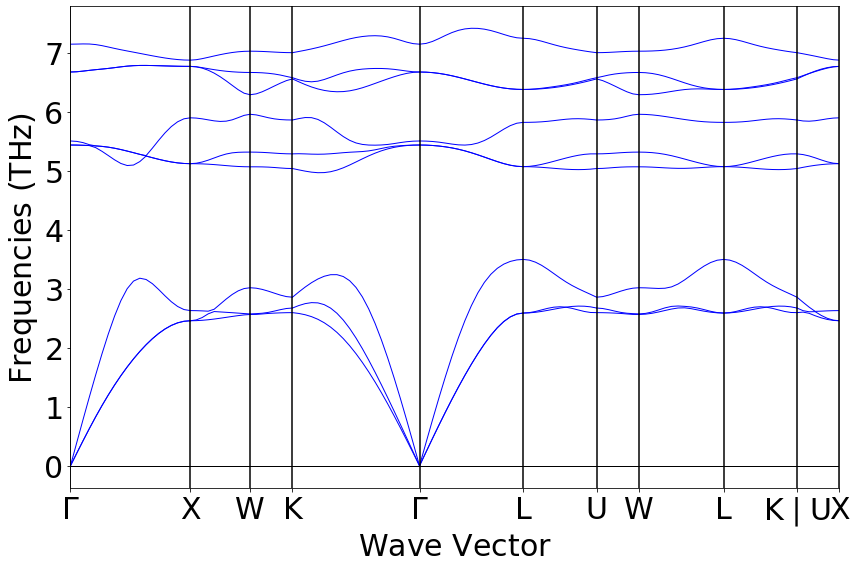

In [16]:
phonon_plot = PhononBSPlotter(phonon) 
phonon_plot.get_plot()

Graph zone de Brillouin.

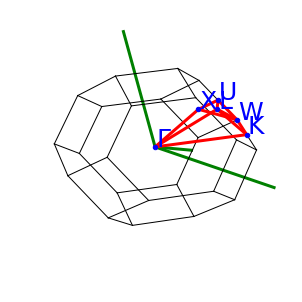

In [15]:
phonon_plot.plot_brillouin() 

Calculer la vitesse du son pour trois branches acoustiques.


In [ ]:
data = phonon_plot.bs_plot_data() #récupération des données nécessaires
distances = data.get("distances")
frequencies = data.get("frequency")

#3 courbe differentes.

courbe1 = frequencies[3][0]
courbe2 = frequencies[4][1]
courbe3 = frequencies[5][2]

In [32]:
def dfdq1(frequence,q):
    pente = np.abs((frequence[-1] - frequence[-2])*10**12)/((q[-1]-q[-2])*10**10)
    return pente
def dfdq2(frequence,q):
    pente = np.abs((frequence[1]-frequence[0])*10**12)/((q[1]-q[0])*10**10)
    return pente

vitesse_son_1 = 2*np.pi*dfdq1(courbe1,distances[3])
vitesse_son_2 = 2*np.pi*dfdq2(courbe2,distances[4])
vitesse_son_3 = 2*np.pi*dfdq1(courbe3,distances[5])

print("La vitesse du son de la branche 1" +str(vitesse_son_1)+ " [m/s].")
print("La vitesse du son de la branche 2" +str(vitesse_son_2)+ "[m/s].")
print("La vitesse du son de la branche 3" +str(vitesse_son_3)+ "[m/s].")

La vitesse du son de la branche 12512.7106376553866 [m/s].
La vitesse du son de la branche 22650.932468302678[m/s].
La vitesse du son de la branche 3585.6782464873253[m/s].


Graph des diffenretes pentes


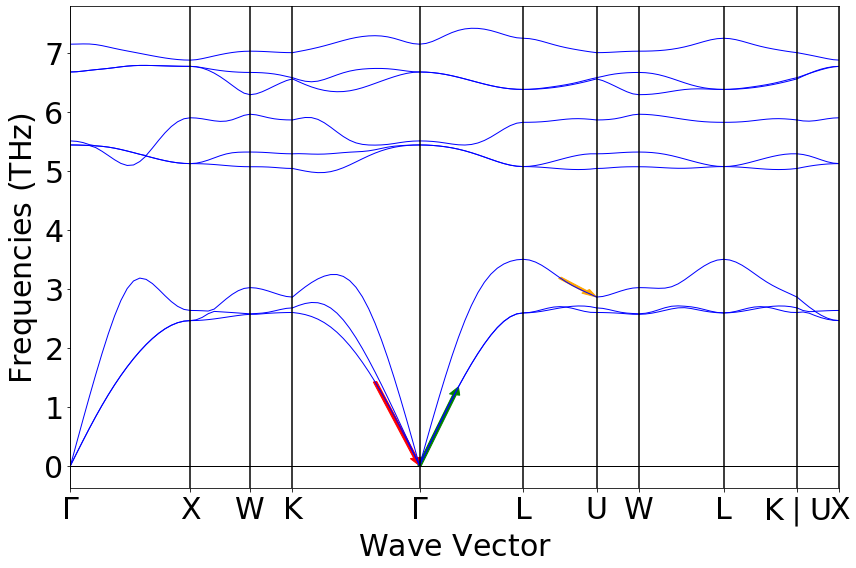

In [28]:
phonon_plot.get_plot()
plt.arrow(distances[3][13],courbe1[13],distances[3][-1]-distances[3][13],courbe1[-1]-courbe1[13], color='red',width = 0.03,length_includes_head =True)
plt.arrow(distances[4][0],courbe2[0],distances[4][6]-distances[4][0],courbe2[6]-courbe2[0], color='green',width = 0.03,length_includes_head =True)
plt.arrow(distances[5][6],courbe3[6],distances[5][-1]-distances[5][6],courbe3[-1]-courbe3[6], color='orange',width = 0.03,length_includes_head =True)